# Bir boyutlu potansiyeller

## Basamak potansiyelinin incelenmesi

In [1]:
%matplotlib inline

from sympy import *
from IPython.display import Math
init_printing()

In [2]:
x = symbols('x', real=True)
hbar, m = symbols('hbar, m', real=True, positive=True)
En, V_0, k, q = symbols('En, V_0, k, q', real=True, positive=True)
R, T = symbols('R, T')

u = Function('u')
V = Function('V')

lprint = lambda X, F: display(Math(X + latex(F)))
rprint = lambda F, X: display(Math(latex(F) + X))
eprint = lambda F1, X, F2: display(Math(latex(F1) + X + latex(F2) ))

In [3]:
eq = diff(u(x), x, x) + k**2 * u(x)
sol = dsolve(eq)

rprint(eq, "= 0")
display(sol)

<IPython.core.display.Math object>

In [4]:
u = Function('u')

j = lambda x: hbar/(2*I*m)*(conjugate(u(x)) * diff(u(x),x) - conjugate(diff(u(x),x))*u(x))
lprint("j(x) = ", simplify(j(x)))

<IPython.core.display.Math object>

In [5]:
u1 = lambda x: exp(I*k*x) + R*exp(-I*k*x)
lprint("u(x) = ", u1(x))

<IPython.core.display.Math object>

In [6]:
u = u1
j1 = simplify(expand(j(x)))
lprint("j(x) = ", j1)

<IPython.core.display.Math object>

In [7]:
u2 = lambda x: T*exp(I*q*x)
display(Math("u(x) = "+ latex(u2(x))))

<IPython.core.display.Math object>

In [8]:
u = u2
j2 = Abs(expand(j(x)))
lprint("j(x) = ", j2)

<IPython.core.display.Math object>

### Korunum ilkesinden

In [9]:
eprint(j1, "=" , j2)

<IPython.core.display.Math object>

### Dalga fonksiyonunun sürekliliğinden

In [10]:
eprint(u1(0), "=" ,u2(0))

<IPython.core.display.Math object>

### Türevlerin sürekliliğinden

In [11]:
du1 = simplify(diff(u1(x), x).subs(x, 0))
du2 = diff(u2(x), x).subs(x, 0)
lprint("\\frac{d u(x)}{dx}|_{x=0-} = ", du1)
lprint("\\frac{d u(x)}{dx}|_{x=0+} = ", du2)
eprint(du1,"=",du2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Yansıma (R) ve geçiş (T) katsayıları

In [12]:
u12 = u1(0) - u2(0)
du12 = du1 - du2
sol = solve((u12, du12), T, R)
lprint("R =", sol[R])
lprint("T =", sol[T])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Yansıma (R) ve geçiş (T) akıları

In [13]:
jR = hbar*k/m * sol[R]**2 
jT = hbar*q/m * sol[T]**2
lprint("j_R =", jR)
lprint("j_T =", jT)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Yansıma (R) ve geçiş (T) akıları: $E$ ve $V_0$ cinsinden

In [14]:
prms = {q:hbar**2/(2*m) * (En-V_0), k:hbar**2/(2*m) * En}
jRe = simplify(jR.subs(prms))
jTe = simplify(jT.subs(prms))
lprint("j_R =", jRe)
lprint("j_T =", jTe)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### $x = E/V_0$ değişken dönüşümü

In [15]:
prms = {En:x*V_0, V_0:En/x}
jRx = simplify(jRe.subs(prms))
jTx = simplify(jTe.subs(prms))
lprint("j_R =", jRx)
lprint("j_T =", jTx)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### $E/V_0 > 1$ için olasılık akılarının grafikleri

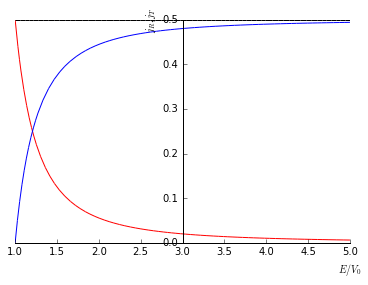

In [16]:
prms = {hbar:1, m:1, En:1}
jRxs = jRx.subs(prms)
jTxs = jTx.subs(prms)

pl = [jRxs, jTxs, jRxs + jTxs, (x, 1 , 5)]
p = plot(*pl, xlabel="$E/V_0$", ylabel= "$j_R, j_T$", show=False)
p[0].line_color="red"
p[1].line_color="blue"
p[2].line_color="black"

p.show()